In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Inicializamos Dataset

In [102]:
# Inicializamos Dataframe
df_shopping = pd.read_csv("customer_shopping_data.csv")

In [103]:
# Mostramos el dataframe con un head
df_shopping.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [104]:
# Mostramos los ultimos valos del dataframe con un tail
df_shopping.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


##### Realizamos Analisis del Dataset

In [105]:
#Informacion sobre los datos
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [106]:
#Estadisticas basicas de mi dataset
df_shopping.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [107]:
#Forma del df
df_shopping.shape

(99457, 10)

In [108]:
# unique sirve para ver valores unicos del atributo 
print("Valores unicos en gender: ",df_shopping["gender"].unique())

Valores unicos en gender:  ['Female' 'Male']


In [109]:
# nunique numero de valore diferentes del atributo
print("Numeros de valores unicos: ",df_shopping["gender"].nunique())

Numeros de valores unicos:  2


In [110]:
# Valores unicos en la columna "payment_method"
print(f"Metodos de pagos: ", df_shopping["payment_method"].unique())

Metodos de pagos:  ['Credit Card' 'Debit Card' 'Cash']


In [111]:
# Hacemos una copia del df original dentro de una nueva variable
df1 = df_shopping.copy()
df1

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [112]:
# convertir la fecha de object a datetime
df1["invoice_date"] = pd.to_datetime(df1["invoice_date"], dayfirst = True)

In [113]:
df1["invoice_date"]

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

In [114]:
# Aplicamos un info para verificar que la variable [invoice_date] ya no es object
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


##### Agregando columna en el df con años y meses

In [115]:
# Agregamos una nueva columna que tendra solo el año 
df1["Year"] = df1["invoice_date"].dt.strftime("%Y")
df1

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021


In [116]:
#Agregar columnas para años
df1["month"] = df1["invoice_date"].dt.month

In [117]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


#### Como es la relacion de genero y numero de transacciones

In [118]:
gender_quantity = df1["gender"].value_counts()
gender_quantity

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [119]:
# Resetear el indice en un dataframe con (reset_index())
df1["gender"].value_counts().reset_index()

,gender,count
0,Female,59482
1,Male,39975


C:\Users\lacar\AppData\Local\Temp\ipykernel_21212\3178347207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df1, x = "gender",palette = 'tab10').set(title = "Gender distribution")


[Text(0.5, 1.0, 'Gender distribution')]

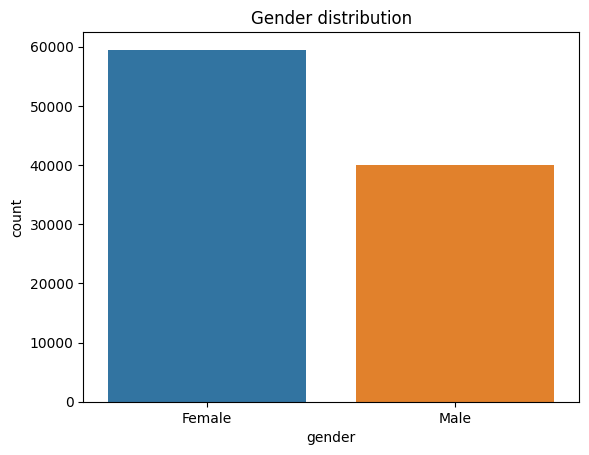

In [120]:
#Creamos el grafico
sns.countplot(data = df1, x = "gender",palette = 'tab10').set(title = "Gender distribution")

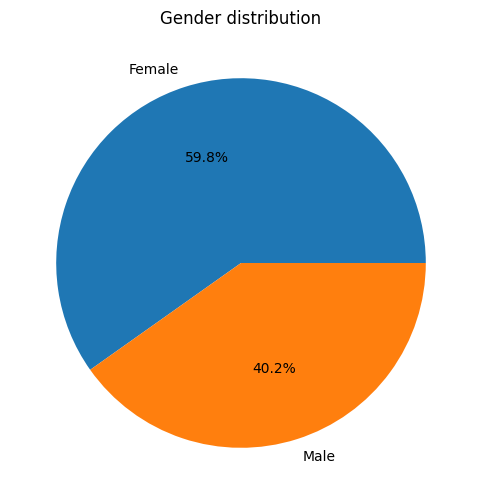

In [121]:
# Definimos una variable para usarlo en el grafico
# Definimos el tamaño del mismo
#Definimos el tipo de grafico que vamos a usar
genero_counts = df1["gender"].value_counts()
plt.figure(figsize = (8,6))
plt.pie(genero_counts, labels = genero_counts.index, autopct = "%1.1f%%")
plt.title("Gender distribution")
plt.show()

#### Distribucion por edades

In [122]:
df2 = df1.copy()

In [123]:
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [124]:
df2["age"].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [125]:
# Nueva columna para categorizar las edades en generaciones ejemplo (Milleniasl, gen z, etc...)
df2["age_etapa"] = df2["age"]

In [126]:
df2

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,28
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,21
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,66
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9,45
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9,27
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3,63
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021,3,56


In [127]:
# Funcion para crear las categorias por edades
def category (age):
    if age >= 18 and age <25:
        return "Gen Z"
    elif age >= 25 and age <34:
        return "Millenials"
    elif age >= 35 and age <50:
        return "Young Gen X"
    elif age >= 50 and age < 65:
        return "Old Gen X"
    else:
        return "Boomers"

In [128]:
df2["age_etapa"] = df2["age"].apply(category)

In [129]:
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X


In [130]:
age_cat_quantity = df2["age_etapa"].value_counts()
age_cat_quantity

age_etapa
Young Gen X    28906
Old Gen X      28547
Millenials     17198
Gen Z          13496
Boomers        11310
Name: count, dtype: int64

[Text(0.5, 1.0, 'Age category')]

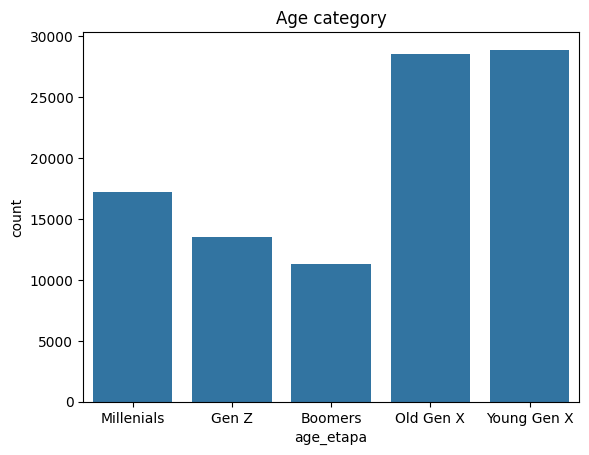

In [131]:
sns.countplot(data = df2, x = "age_etapa").set(title = "Age category")

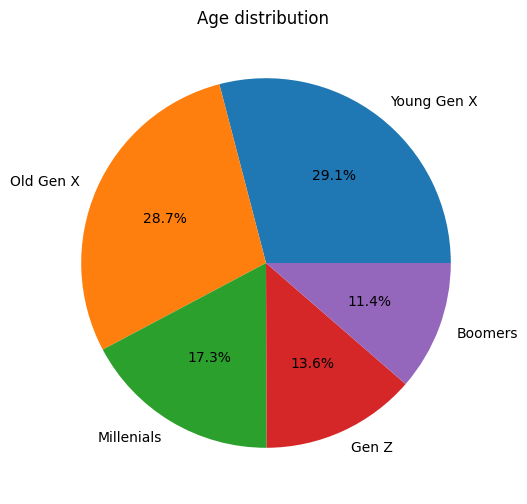

In [132]:
etapa_counts = df2["age_etapa"].value_counts()
#Definimos el tamaño del grafico
plt.figure(figsize = (8,6))
#Definimos el tipo de grafico
plt.pie(etapa_counts, labels = etapa_counts.index, autopct = "%1.1f%%")
plt.title("Age distribution ")
plt.show()

##### Que grupo de edad gasto mas ?

In [133]:
df3 = df2.copy()
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X


In [134]:
# Multiplicamos la cantidad de productos con el precio para saber el total gastado
df3["total"] = df3["quantity"] * df3["price"]

In [135]:
#Agrupamos categorias
df_spend = df3.groupby("age_etapa")["total"].sum().reset_index()
df_spend

,age_etapa,total
0,Boomers,28676812.76
1,Gen Z,33454083.87
2,Millenials,43054879.19
3,Old Gen X,71961241.44
4,Young Gen X,74358776.99


C:\Users\lacar\AppData\Local\Temp\ipykernel_21212\2086318709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_spend, x = 'age_etapa', y = 'total', palette = 'flare').set(title = "Distribution per age")


[Text(0.5, 1.0, 'Distribution per age')]

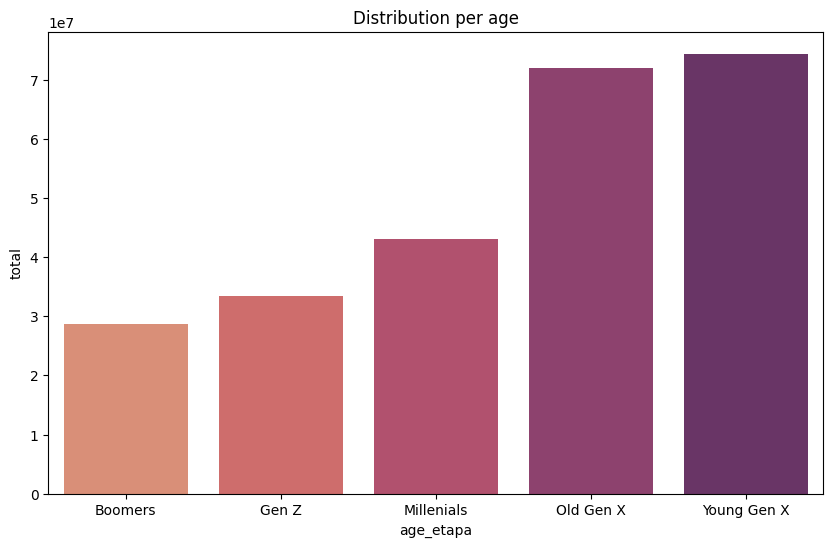

In [136]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_spend, x = 'age_etapa', y = 'total', palette = 'flare').set(title = "Distribution per age")

<Axes: >

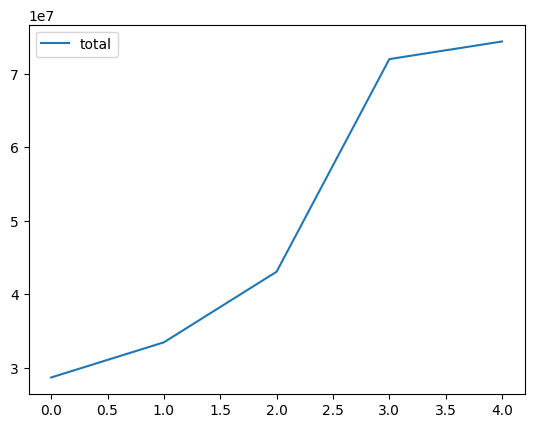

In [137]:
df_spend.plot()

##### En nuestro analisis podemos apreciar que el grupo que mas gasto dinero fueron la generacion: Young gen x

#### Distribucion de edades entre hombres y mujeres

In [138]:
df4 = df3.copy()

In [139]:
df4.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [140]:
df4[["gender", "age_etapa"]].value_counts().reset_index()

,gender,age_etapa,count
0,Female,Young Gen X,17355
1,Female,Old Gen X,17080
2,Male,Young Gen X,11551
3,Male,Old Gen X,11467
4,Female,Millenials,10344
5,Female,Gen Z,7938
6,Male,Millenials,6854
7,Female,Boomers,6765
8,Male,Gen Z,5558
9,Male,Boomers,4545


In [141]:
df4.groupby(["gender", "age_etapa"]).size().unstack(fill_value = 0)

age_etapa,Boomers,Gen Z,Millenials,Old Gen X,Young Gen X
gender,,,,,
Female,6765,7938,10344,17080,17355
Male,4545,5558,6854,11467,11551


[Text(0.5, 1.0, 'Age distribution')]

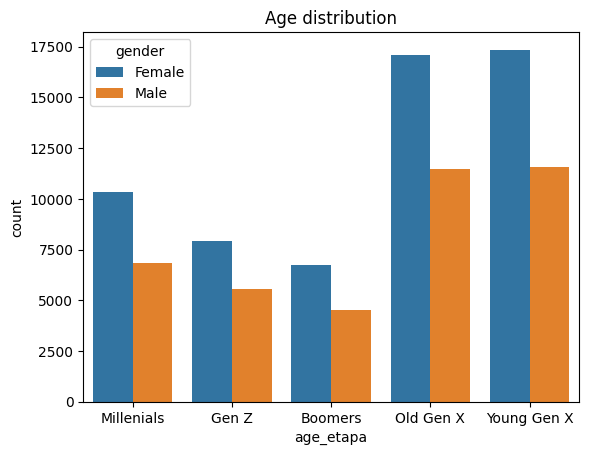

In [142]:
sns.countplot(data = df4, x = "age_etapa", hue = "gender").set(title = "Age distribution")

##### Forma de pago y número de transacciones

In [143]:
df5 = df4.copy()
df5.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [144]:
df5["payment_method"].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [145]:
method = df5["payment_method"].unique()
print(f"Los metodos de pagos son :", method)

Los metodos de pagos son : ['Credit Card' 'Debit Card' 'Cash']


In [146]:
df5.groupby(["payment_method", "gender"]).size().unstack(fill_value= 0)

gender,Female,Male
payment_method,,
Cash,26509,17938
Credit Card,21011,13920
Debit Card,11962,8117


[Text(0.5, 1.0, ' pay distribution')]

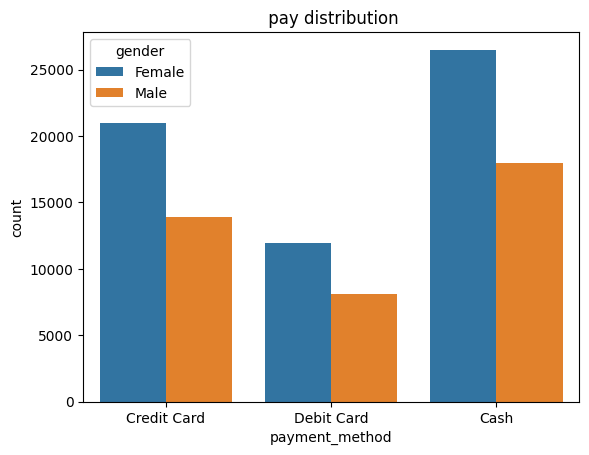

In [147]:
# 
sns.countplot(data = df5, x = "payment_method", hue = "gender").set(title = " pay distribution")

#### Relacion entre la cantidad de dinero gastada y el metodo de pago 

In [148]:
df6 = df5.copy()
df6.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [149]:
print(f"Los metodos de pagos son: ", df6["payment_method"].unique())

Los metodos de pagos son:  ['Credit Card' 'Debit Card' 'Cash']


In [150]:
df6.groupby("payment_method")["total"].sum().reset_index()

,payment_method,total
0,Cash,1.128322e+08
1,Credit Card,8.807712e+07
2,Debit Card,5.059643e+07


In [151]:
suma_total = df6.groupby("payment_method")["total"].sum()

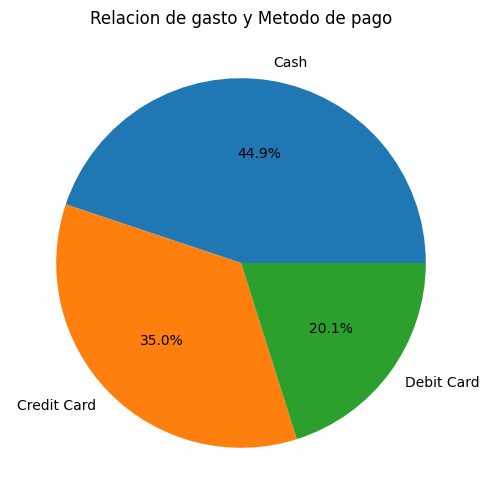

In [152]:
plt.figure(figsize = (10,6))
plt.pie(suma_total, labels = suma_total.index,autopct="%1.1f%%")
plt.title("Relacion de gasto y Metodo de pago")
plt.show()

#### Investigar qué precios de productos suelen preferir los clientes

In [153]:
df7 = df6.copy()
df7.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [154]:
df7.sort_values(["price"], ascending= False).head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
26201,I321861,C140969,Male,30,Technology,5,5250.0,Debit Card,2021-12-23,Istinye Park,2021,12,Millenials,26250.0
86791,I989037,C873836,Female,54,Technology,5,5250.0,Cash,2022-03-16,Metrocity,2022,3,Old Gen X,26250.0
86793,I292024,C142240,Female,50,Technology,5,5250.0,Cash,2021-03-14,Istinye Park,2021,3,Old Gen X,26250.0
41870,I258591,C174024,Female,27,Technology,5,5250.0,Cash,2022-11-09,Metropol AVM,2022,11,Millenials,26250.0
7559,I148353,C138646,Female,38,Technology,5,5250.0,Cash,2022-09-13,Kanyon,2022,9,Young Gen X,26250.0


In [203]:
df7.groupby(["age_etapa", "category"])["price"].describe()

count         mean          std      min  \
age_etapa   category                                                      
Boomers     Books              572.0    46.059178    21.161762    15.15   
            Clothing          3872.0   906.905000   429.501337   300.08   
            Cosmetics         1725.0   122.922841    57.008442    40.66   
            Food & Beverage   1690.0    15.374343     7.341222     5.23   
            Shoes             1126.0  1798.377957   843.468097   600.17   
            Souvenir           563.0    35.064991    16.380323    11.73   
            Technology         585.0  3173.333333  1449.352713  1050.00   
            Toys              1177.0   107.550450    50.328575    35.84   
Gen Z       Books              687.0    47.059825    21.683346    15.15   
            Clothing          4686.0   890.314178   426.001699   300.08   
            Cosmetics         1979.0   122.781283    57.139076    40.66   
            Food & Beverage   2051.0    15.659400     7.369164     5.23   
            Shoes             1367.0  1825.096335   836.518077   600.17   
            Souvenir           672.0    35.312188    16.778784    11.73   
            Technology         648.0  3101.388889  1477.222084  1050.00   
            Toys              1406.0   108.769047    50.262404    35.84   
Millenials  Books              844.0    45.270498    22.013768    15.15   
            Clothing          5974.0   899.185149   424.677748   300.08   
            Cosmetics         2622.0   122.801884    57.226637    40.66   
            Food & Beverage   2516.0    15.708708     7.388221     5.23   
            Shoes             1738.0  1813.286922   841.925941   600.17   
            Souvenir           879.0    35.563652    16.470730    11.73   
            Technology         861.0  3069.512195  1481.008533  1050.00   
            Toys              1764.0   107.012063    50.372846    35.84   
Old Gen X   Books             1464.0    44.798053    21.323638    15.15   
            Clothing          9893.0   906.063851   419.591137   300.08   
            Cosmetics         4393.0   121.554241    57.506893    40.66   
            Food & Beverage   4219.0    15.723470     7.456948     5.23   
            Shoes             2908.0  1788.539622   852.471698   600.17   
            Souvenir          1446.0    34.500477    16.748685    11.73   
            Technology        1387.0  3180.281182  1500.603099  1050.00   
            Toys              2837.0   107.962157    50.374235    35.84   
Young Gen X Books             1414.0    45.621429    21.379110    15.15   
            Clothing         10062.0   900.090885   425.588139   300.08   
            Cosmetics         4378.0   122.797286    57.882405    40.66   
            Food & Beverage   4300.0    15.722840     7.465193     5.23   
            Shoes             2895.0  1817.924259   844.472979   600.17   
            Souvenir          1439.0    34.619395    16.410678    11.73   
            Technology        1515.0  3202.673267  1477.596158  1050.00   
            Toys              2903.0   107.520000    50.440302    35.84   

                                 25%      50%      75%      max  
age_etapa   category                                             
Boomers     Books              30.30    45.45    60.60    75.75  
            Clothing          600.16   900.24  1200.32  1500.40  
            Cosmetics          81.32   121.98   162.64   203.30  
            Food & Beverage    10.46    15.69    20.92    26.15  
            Shoes            1200.34  1800.51  2400.68  3000.85  
            Souvenir           23.46    35.19    46.92    58.65  
            Technology       2100.00  3150.00  4200.00  5250.00  
            Toys               71.68   107.52   143.36   179.20  
Gen Z       Books              30.30    45.45    60.60    75.75  
            Clothing          600.16   900.24  1200.32  1500.40  
            Cosmetics          81.32   121.98   162.64   203.30  
            Food & Bev

In [200]:
#Numero de transacciones por precio por categira de productos
df7.groupby("category")["price"].value_counts().reset_index()

,category,price,count
0,Books,75.75,1029
1,Books,30.30,1008
2,Books,45.45,1000
3,Books,15.15,985
4,Books,60.60,959
5,Clothing,600.16,6950
6,Clothing,1500.40,6940
7,Clothing,900.24,6907
8,Clothing,1200.32,6849
9,Clothing,300.08,6841


##### Most populous category

In [157]:
df8 = df7.copy()
df8

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9,Young Gen X,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9,Millenials,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3,Old Gen X,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021,3,Old Gen X,16800.00


In [158]:
producto_df = df8.groupby("category").size().sort_values(ascending = False)

In [159]:
producto_df

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
dtype: int64

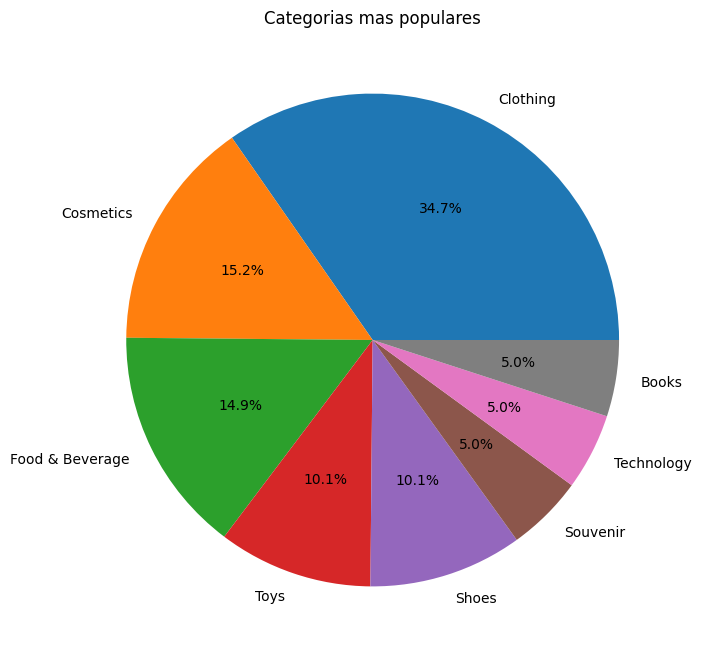

In [160]:
plt.figure(figsize=(12, 8))
plt.pie(producto_df, labels=producto_df.index, autopct='%1.1f%%')
plt.title('Categorias mas populares')
plt.show()

#### Categorías populares por número de transacciones y monto total gastado

In [161]:
df9 = df8.copy()
df9.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [162]:
print(f"El numero de transacciones es:",df9.shape[0])

El numero de transacciones es: 99457


In [163]:
df9.groupby('category')['total'].sum()

category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: total, dtype: float64

In [164]:
total_category = df9.groupby('category')['total'].sum()

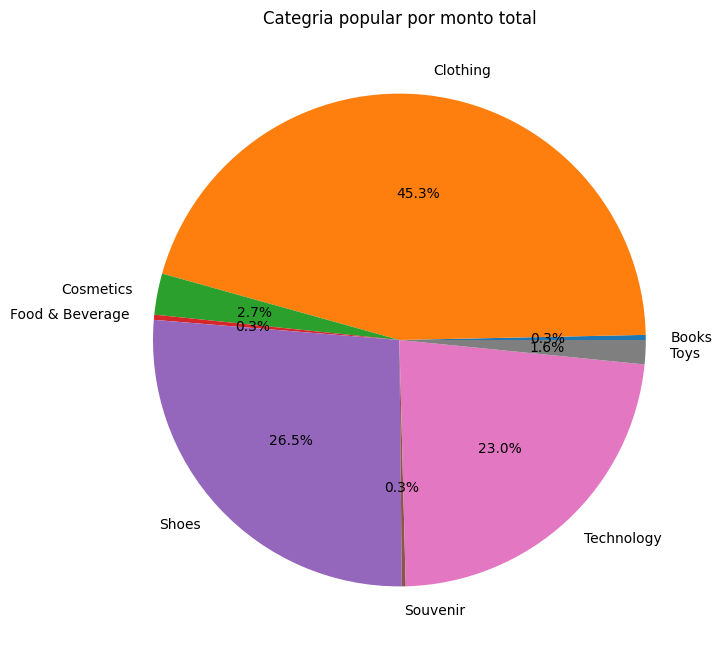

In [165]:
plt.figure(figsize = (12, 8))
plt.pie(total_category, labels = total_category.index, autopct= '%1.1f%%')
plt.title('Categria popular por monto total')
plt.show()

#### ¿Cuál es el precio promedio por categoría?

In [166]:
df10 = df9.copy()
df10.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [167]:
media = df10.groupby("category")["price"].describe()
media

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Books,4981.0,45.568621,21.492662,15.15,30.30,45.45,60.60,75.75
Clothing,34487.0,901.084021,424.225594,300.08,600.16,900.24,1200.32,1500.40
Cosmetics,15097.0,122.448626,57.458097,40.66,81.32,121.98,162.64,203.30
Food & Beverage,14776.0,15.671948,7.422176,5.23,10.46,15.69,20.92,26.15
Shoes,10034.0,1807.388568,845.116269,600.17,1200.34,1800.51,2400.68,3000.85
Souvenir,4999.0,34.894345,16.564498,11.73,23.46,35.19,46.92,58.65
Technology,4996.0,3156.935548,1481.559805,1050.00,2100.00,3150.00,4200.00,5250.00
Toys,10087.0,107.733185,50.364844,35.84,71.68,107.52,143.36,179.20


In [168]:
media.iloc[: , :2]

,count,mean
category,,
Books,4981.0,45.568621
Clothing,34487.0,901.084021
Cosmetics,15097.0,122.448626
Food & Beverage,14776.0,15.671948
Shoes,10034.0,1807.388568
Souvenir,4999.0,34.894345
Technology,4996.0,3156.935548
Toys,10087.0,107.733185


####  Distribución de número de transacciones por grupos de edad y género

In [169]:
df11 = df10.copy()
df11.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [170]:
#obteniendo la distribucion con groupby
dist_age_gender = df11.groupby(["age_etapa", "gender"]).size()
dist_age_gender

age_etapa    gender
Boomers      Female     6765
             Male       4545
Gen Z        Female     7938
             Male       5558
Millenials   Female    10344
             Male       6854
Old Gen X    Female    17080
             Male      11467
Young Gen X  Female    17355
             Male      11551
dtype: int64

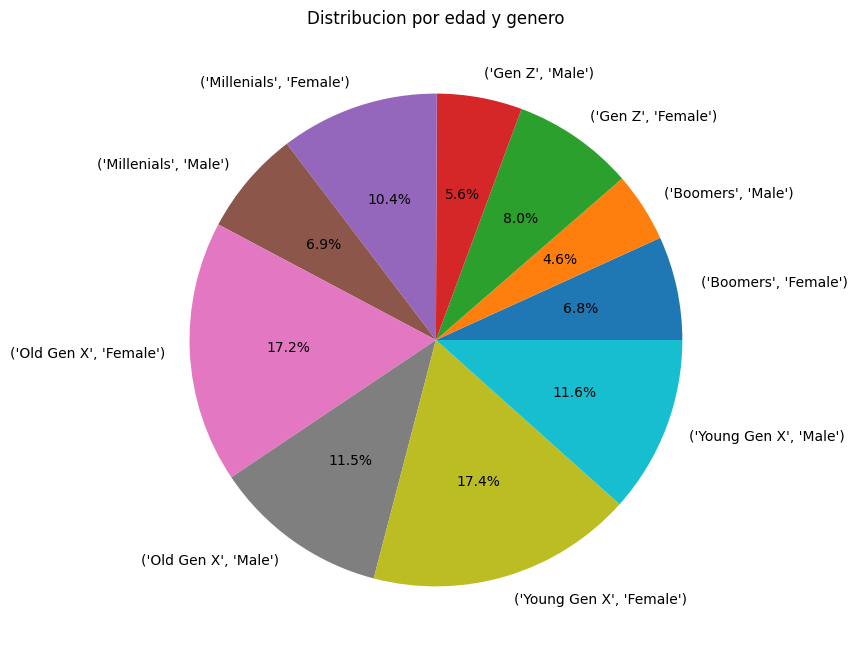

In [171]:
plt.figure(figsize = (10,8))
plt.pie(dist_age_gender, labels = dist_age_gender.index, autopct= '%1.1f%%')
plt.title('Distribucion por edad y genero')
plt.show()

In [172]:
# Usando value_counts() 
df11[['age_etapa', 'gender']].value_counts()

age_etapa    gender
Young Gen X  Female    17355
Old Gen X    Female    17080
Young Gen X  Male      11551
Old Gen X    Male      11467
Millenials   Female    10344
Gen Z        Female     7938
Millenials   Male       6854
Boomers      Female     6765
Gen Z        Male       5558
Boomers      Male       4545
Name: count, dtype: int64

Text(0.5, 1.0, 'Age and gender distribution')

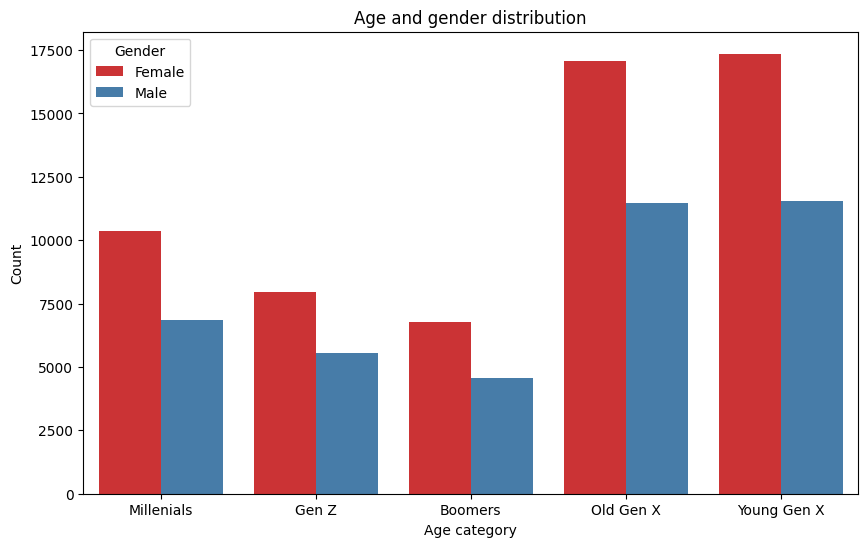

In [173]:
#Damos tamaño al grafico
#Definimos el tipo de grafico
plt.figure(figsize = (10,6))
sns.countplot(data = df11, x = "age_etapa", hue = "gender", palette = 'Set1')
plt.legend(title = 'Gender')
plt.xlabel('Age category')
plt.ylabel('Count')
plt.title('Age and gender distribution')

#### ¿Cuánto gastó en total cada combinación de género y grupo de edad en diferentes categorías?

In [174]:
df12_1 = df11.copy()
df12_1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [175]:
# Agrupamos categporias
df_gender = df12_1.groupby(['gender', 'age_etapa'])['total'].sum().sort_values(ascending = True).reset_index()
df_gender

,gender,age_etapa,total
0,Male,Boomers,11836483.01
1,Male,Gen Z,13168961.53
2,Female,Boomers,16840329.75
3,Male,Millenials,17361667.88
4,Female,Gen Z,20285122.34
5,Female,Millenials,25693211.31
6,Male,Old Gen X,28817164.11
7,Male,Young Gen X,30114381.70
8,Female,Old Gen X,43144077.33
9,Female,Young Gen X,44244395.29


Text(0.5, 1.0, 'Age and gender distribution')

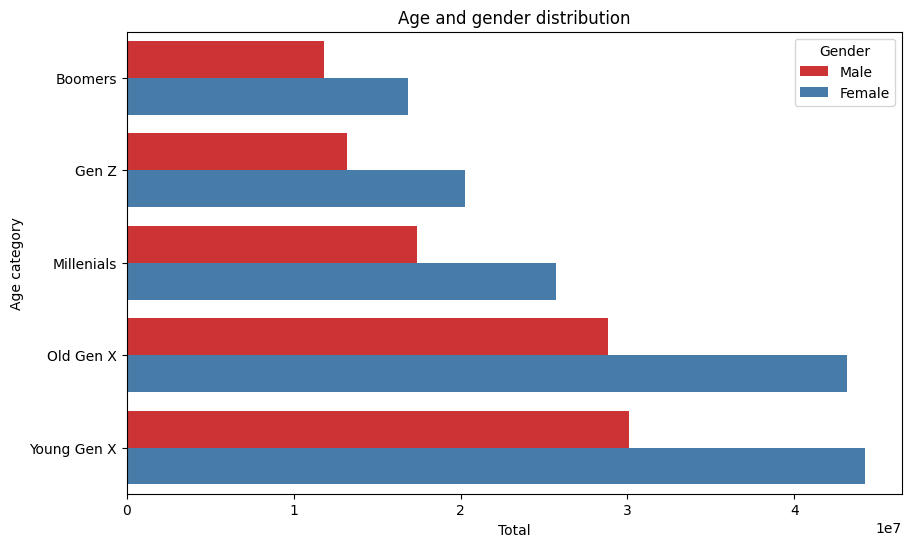

In [176]:
# Grafico con brablot:
####Definimos el tamaño del grafico en pantalla
#### Definimos el tipo de grafico a usar
plt.figure(figsize=(10,6))
sns.barplot(data = df_gender, x = 'total', y='age_etapa', hue= 'gender', palette = 'Set1')
plt.legend(title = 'Gender')
plt.xlabel('Total')
plt.ylabel('Age category')
plt.title('Age and gender distribution')

In [177]:
df_female = df_gender[df_gender['gender'] == 'Female']
df_female

,gender,age_etapa,total
2,Female,Boomers,16840329.75
4,Female,Gen Z,20285122.34
5,Female,Millenials,25693211.31
8,Female,Old Gen X,43144077.33
9,Female,Young Gen X,44244395.29


In [178]:
df_male = df_gender.loc[df_gender['gender'] == 'Male']
df_male

,gender,age_etapa,total
0,Male,Boomers,11836483.01
1,Male,Gen Z,13168961.53
3,Male,Millenials,17361667.88
6,Male,Old Gen X,28817164.11
7,Male,Young Gen X,30114381.70


####  Los centros comerciales más populares por número de transacciones

In [179]:
df12 = df11.copy()
df12

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9,Young Gen X,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9,Millenials,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3,Old Gen X,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021,3,Old Gen X,16800.00


In [180]:
df12['shopping_mall'].nunique()

10

In [181]:
df12.value_counts('shopping_mall')

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [182]:
df12.groupby('shopping_mall').size().sort_values(ascending= False)

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
dtype: int64

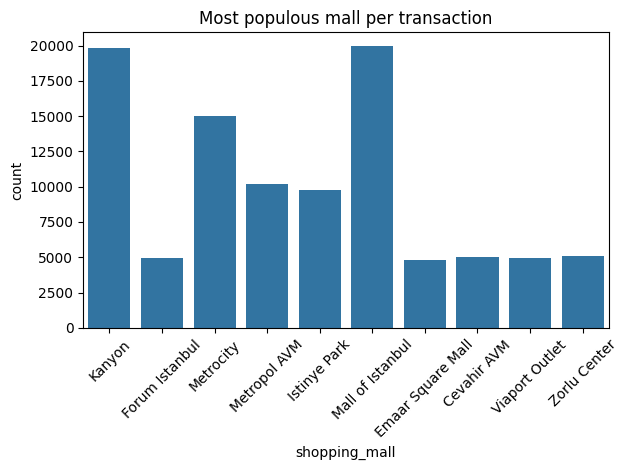

In [183]:
sns.countplot(data = df12, x = "shopping_mall").set(title = "Most populous mall per transaction")
plt.xticks(rotation=45)
plt.tight_layout()

#### ¿En qué centro comercial se gasta más dinero?

In [184]:
df13 = df12.copy()
df13.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [185]:
df13.groupby('shopping_mall')['total'].sum().sort_values(ascending= False)

shopping_mall
Mall of Istanbul     50872481.68
Kanyon               50554231.10
Metrocity            37302787.33
Metropol AVM         25379913.19
Istinye Park         24618827.68
Zorlu Center         12901053.82
Cevahir AVM          12645138.20
Viaport Outlet       12521339.72
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Name: total, dtype: float64

In [186]:
total_mall = df13.groupby('shopping_mall')['total'].sum().sort_values(ascending= False)

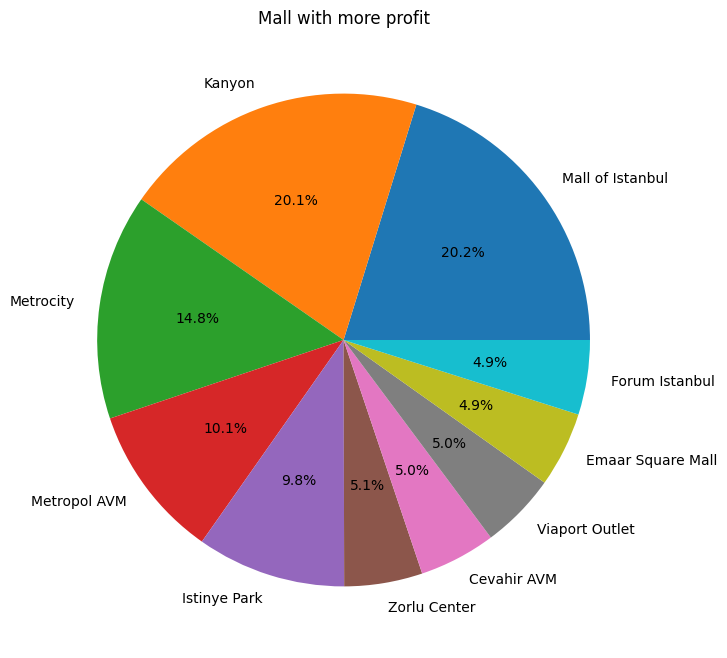

In [187]:
plt.figure(figsize = (12,8))
plt.pie(total_mall, labels = total_mall.index, autopct = '%1.1f%%')
plt.title('Mall with more profit')
plt.show()

#### Total gastado por mes entre 2021-2023

In [188]:
df14 = df13.copy()
df14.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [189]:
df14['Year'].unique()

array(['2022', '2021', '2023'], dtype=object)

In [190]:
df14['Year'].value_counts().reset_index()

,Year,count
0,2022,45551
1,2021,45382
2,2023,8524


In [191]:
df_year_total = df14.groupby('Year')['total'].sum()
df_year_total

Year
2021    1.145606e+08
2022    1.154368e+08
2023    2.150841e+07
Name: total, dtype: float64

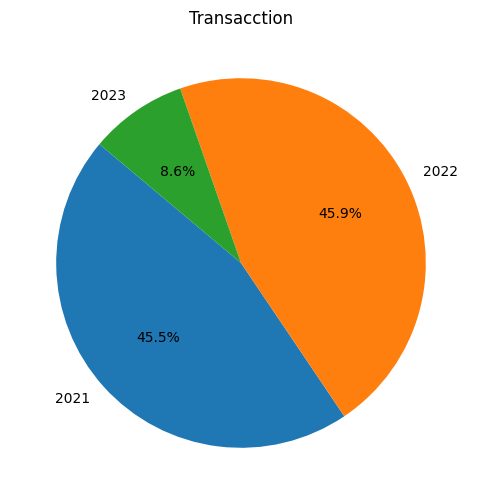

In [198]:
#Grafica
plt.figure(figsize = (10,6))
plt.pie(df_year_total, labels=df_year_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Transacction')
plt.show()

#### Modificaciones Adicionales 
* Como modificar el orden de las columnas en el df ?

In [193]:
df15 = df14.copy()
df15.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,month,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,Old Gen X,242.40


In [194]:
# Nombres de los atributos del df
columns_name = df15.columns.to_list()
print(columns_name)

['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall', 'Year', 'month', 'age_etapa', 'total']


In [195]:
df15['invoice_no'].nunique()
df15['customer_id'].nunique()

99457

In [196]:
columns_name2 = ['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date','Year', 'month', 'shopping_mall','age_etapa', 'total']

In [197]:

df_order = df15[columns_name2]
df_order.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,Year,month,shopping_mall,age_etapa,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,Old Gen X,242.40
